In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data = pd.read_csv('country_data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# hanya dijalani sekali
data['exports']=data['gdpp']*(data['exports']/100)
data['health']=data['gdpp']*(data['health']/100)
data['imports']=data['gdpp']*(data['imports']/100)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [4]:
data.shape

(167, 10)

In [5]:
format(len(data[data.duplicated()]))

'0'

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


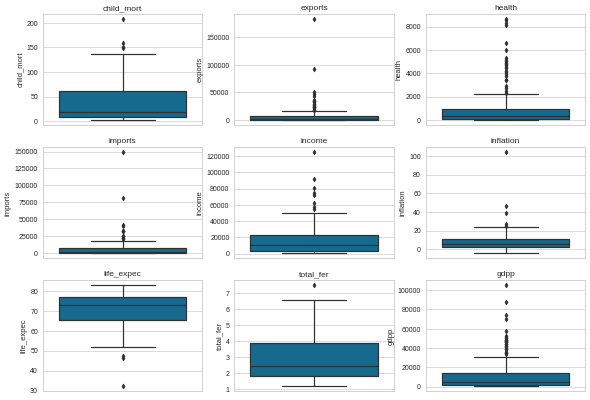

In [8]:
fig = plt.figure(figsize=(14,10), dpi=50)
count=0
for fitur in data.columns.to_list()[1:]:
    count+=1
    ax = fig.add_subplot(3,3,count)
    ax = sns.boxplot(y=data[fitur])
    ax.set_title(fitur)

In [9]:
# Berdasarkan boxplot, terdapat outlier dengan child_mort yang terlalu tinggi
data[data.child_mort>200]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662


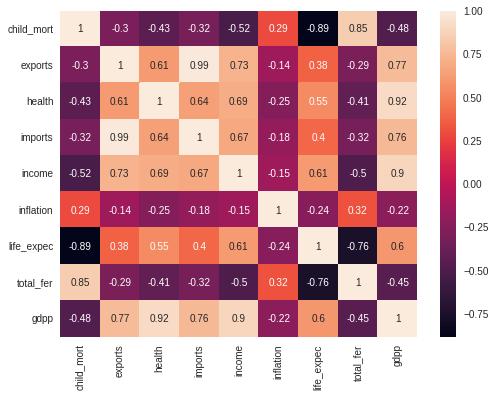

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(data=data.corr(),annot = True)
plt.show()

<Figure size 576x432 with 0 Axes>

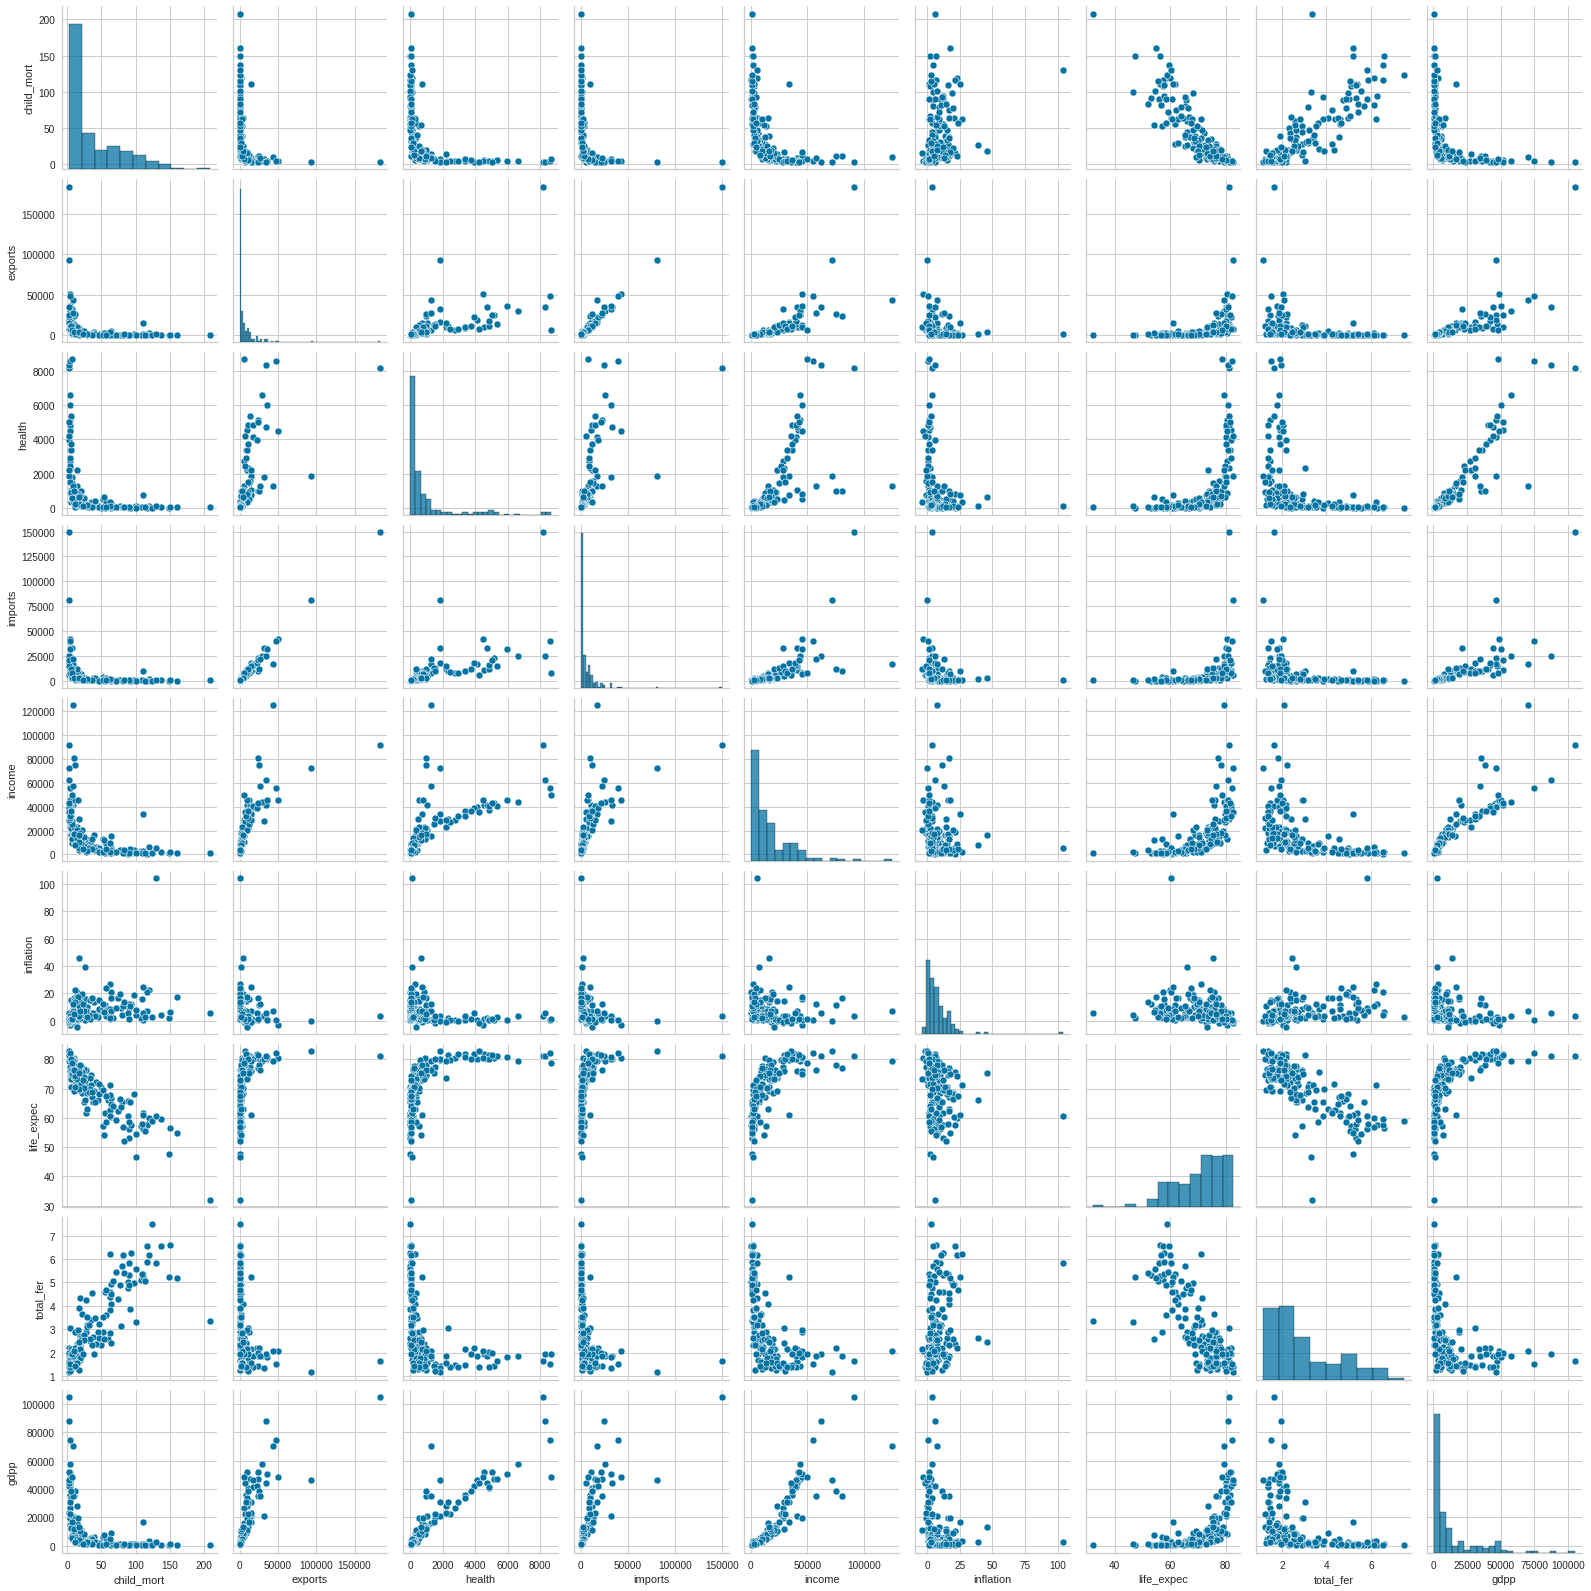

In [11]:
plt.figure(figsize=(8,6))
sns.pairplot(data)
plt.show()

In [12]:
data_minmax = preprocessing.MinMaxScaler().fit_transform(data.drop('country', axis=1))

In [13]:
wcss = []
for i in range (1,15):
  wcss.append(KMeans(n_clusters=i, random_state=42).fit(data_minmax).inertia_)

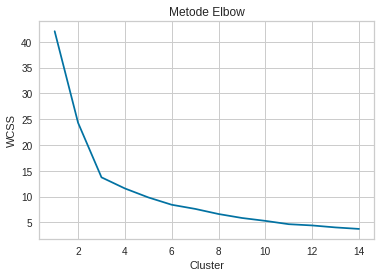

In [14]:
plt.title('Metode Elbow')
plt.plot(range(1, 15), wcss)
plt.xlabel('Cluster')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans_label = kmeans.fit_predict(data_minmax)

In [16]:
data['cluster'] = kmeans_label
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [17]:
data.cluster.value_counts()

1    93
0    46
2    28
Name: cluster, dtype: int64

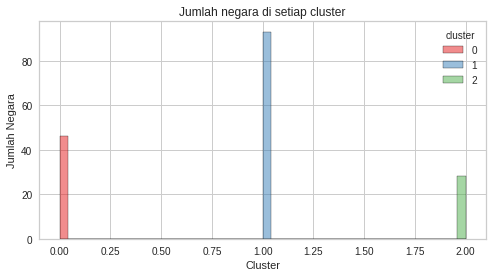

In [18]:
plt.figure(figsize=(8,4))
sns.histplot(data=data, x='cluster', hue='cluster', bins = 50, palette='Set1')
plt.title('Jumlah negara di setiap cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Negara')
plt.show()

In [19]:
# data.groupby(['cluster','country']).mean()

In [20]:
data.groupby('cluster').describe().T

cluster                      0             1              2
child_mort count     46.000000     93.000000      28.000000
           mean      93.284783     21.092473       4.942857
           std       34.079410     14.676891       2.272448
           min       28.100000      3.200000       2.600000
           25%       64.625000     10.300000       3.500000
...                        ...           ...            ...
gdpp       min      231.000000    592.000000   26900.000000
           25%      548.500000   3040.000000   37825.000000
           50%      833.000000   5840.000000   45350.000000
           75%     1310.000000  11200.000000   50700.000000
           max    17100.000000  30600.000000  105000.000000

[72 rows x 3 columns]

In [21]:
data.corr().cluster.sort_values(ascending=False)

cluster       1.000000
life_expec    0.814682
gdpp          0.752432
income        0.736194
health        0.694310
imports       0.486544
exports       0.477644
inflation    -0.289880
child_mort   -0.785308
total_fer    -0.795230
Name: cluster, dtype: float64

In [22]:
data[data.cluster==0].sort_values(by=['life_expec', 'gdpp','income']).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,0
87,Lesotho,99.7,460.980,129.8700,1181.700,2380,4.15,46.5,3.30,1170,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,0
166,Zambia,83.1,540.200,85.9940,451.140,3280,14.00,52.0,5.40,1460,0
94,Malawi,90.5,104.652,30.2481,160.191,1030,12.10,53.1,5.31,459,0
106,Mozambique,101.0,131.985,21.8299,193.578,918,7.64,54.5,5.56,419,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,0
64,Guinea-Bissau,114.0,81.503,46.4950,192.544,1390,2.97,55.6,5.05,547,0
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.44,56.2,5.82,553,0
40,Cote d'Ivoire,111.0,617.320,64.6600,528.260,2690,5.39,56.3,5.27,1220,0


In [23]:
data[data.cluster==1].sort_values(by=['life_expec', 'gdpp','income']).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
137,South Africa,53.7,2082.08000,650.8320,1994.720000,12000,6.35,54.3,2.59,7280,1
21,Botswana,52.5,2768.60000,527.0500,3257.550000,13300,8.92,57.1,2.88,6350,1
162,Vanuatu,29.2,1384.02000,155.9250,1565.190000,2950,2.62,63.0,3.50,2970,1
52,Fiji,24.1,2109.70000,177.3900,2332.350000,7350,4.23,65.3,2.67,3650,1
101,"Micronesia, Fed. Sts.",40.0,672.10000,406.1200,2316.600000,3340,3.80,65.4,3.46,2860,1
65,Guyana,37.6,1562.56000,163.5520,2404.640000,5840,5.73,65.5,2.65,3040,1
27,Cambodia,44.4,425.22600,44.6448,467.670000,2520,3.12,66.1,2.88,786,1
69,India,58.8,305.10000,54.6750,365.850000,4410,8.98,66.2,2.60,1350,1
103,Mongolia,26.1,1237.55000,144.1600,1502.550000,7710,39.20,66.2,2.64,2650,1
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720,7.04,66.8,2.41,988,1


In [24]:
data[data.cluster==2].sort_values(by=['life_expec', 'gdpp','income']).head(10) 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
157,United Arab Emirates,8.6,27195.0,1281.00,22260.0,57600,12.500,76.5,1.87,35000,2
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300,2
82,Kuwait,10.8,25679.5,1012.55,11704.0,75200,11.200,78.2,2.21,38500,2
159,United States,7.3,6001.6,8663.60,7647.2,49400,1.220,78.7,1.93,48400,2
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,2
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.980,79.5,2.07,70300,2
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800,2
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,2
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,2
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,2


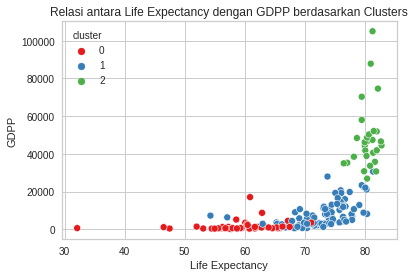

In [25]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data, x='life_expec',y='gdpp',hue='cluster',palette='Set1')
plt.title('Relasi antara Life Expectancy dengan GDPP berdasarkan Clusters')
plt.xlabel('Life Expectancy')
plt.ylabel('GDPP')
plt.show()

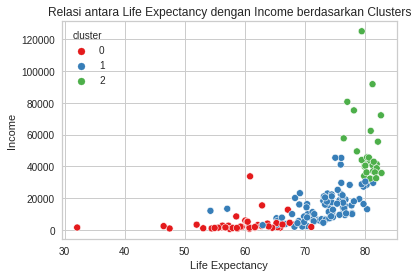

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data, x='life_expec',y='income',hue='cluster',palette='Set1')
plt.title('Relasi antara Life Expectancy dengan Income berdasarkan Clusters')
plt.xlabel('Life Expectancy')
plt.ylabel('Income')
plt.show()

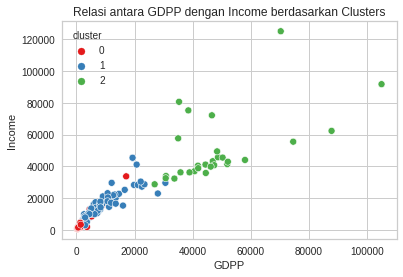

In [27]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data, x='gdpp',y='income',hue='cluster',palette='Set1')
plt.title('Relasi antara GDPP dengan Income berdasarkan Clusters')
plt.xlabel('GDPP')
plt.ylabel('Income')
plt.show()

<Figure size 576x432 with 0 Axes>

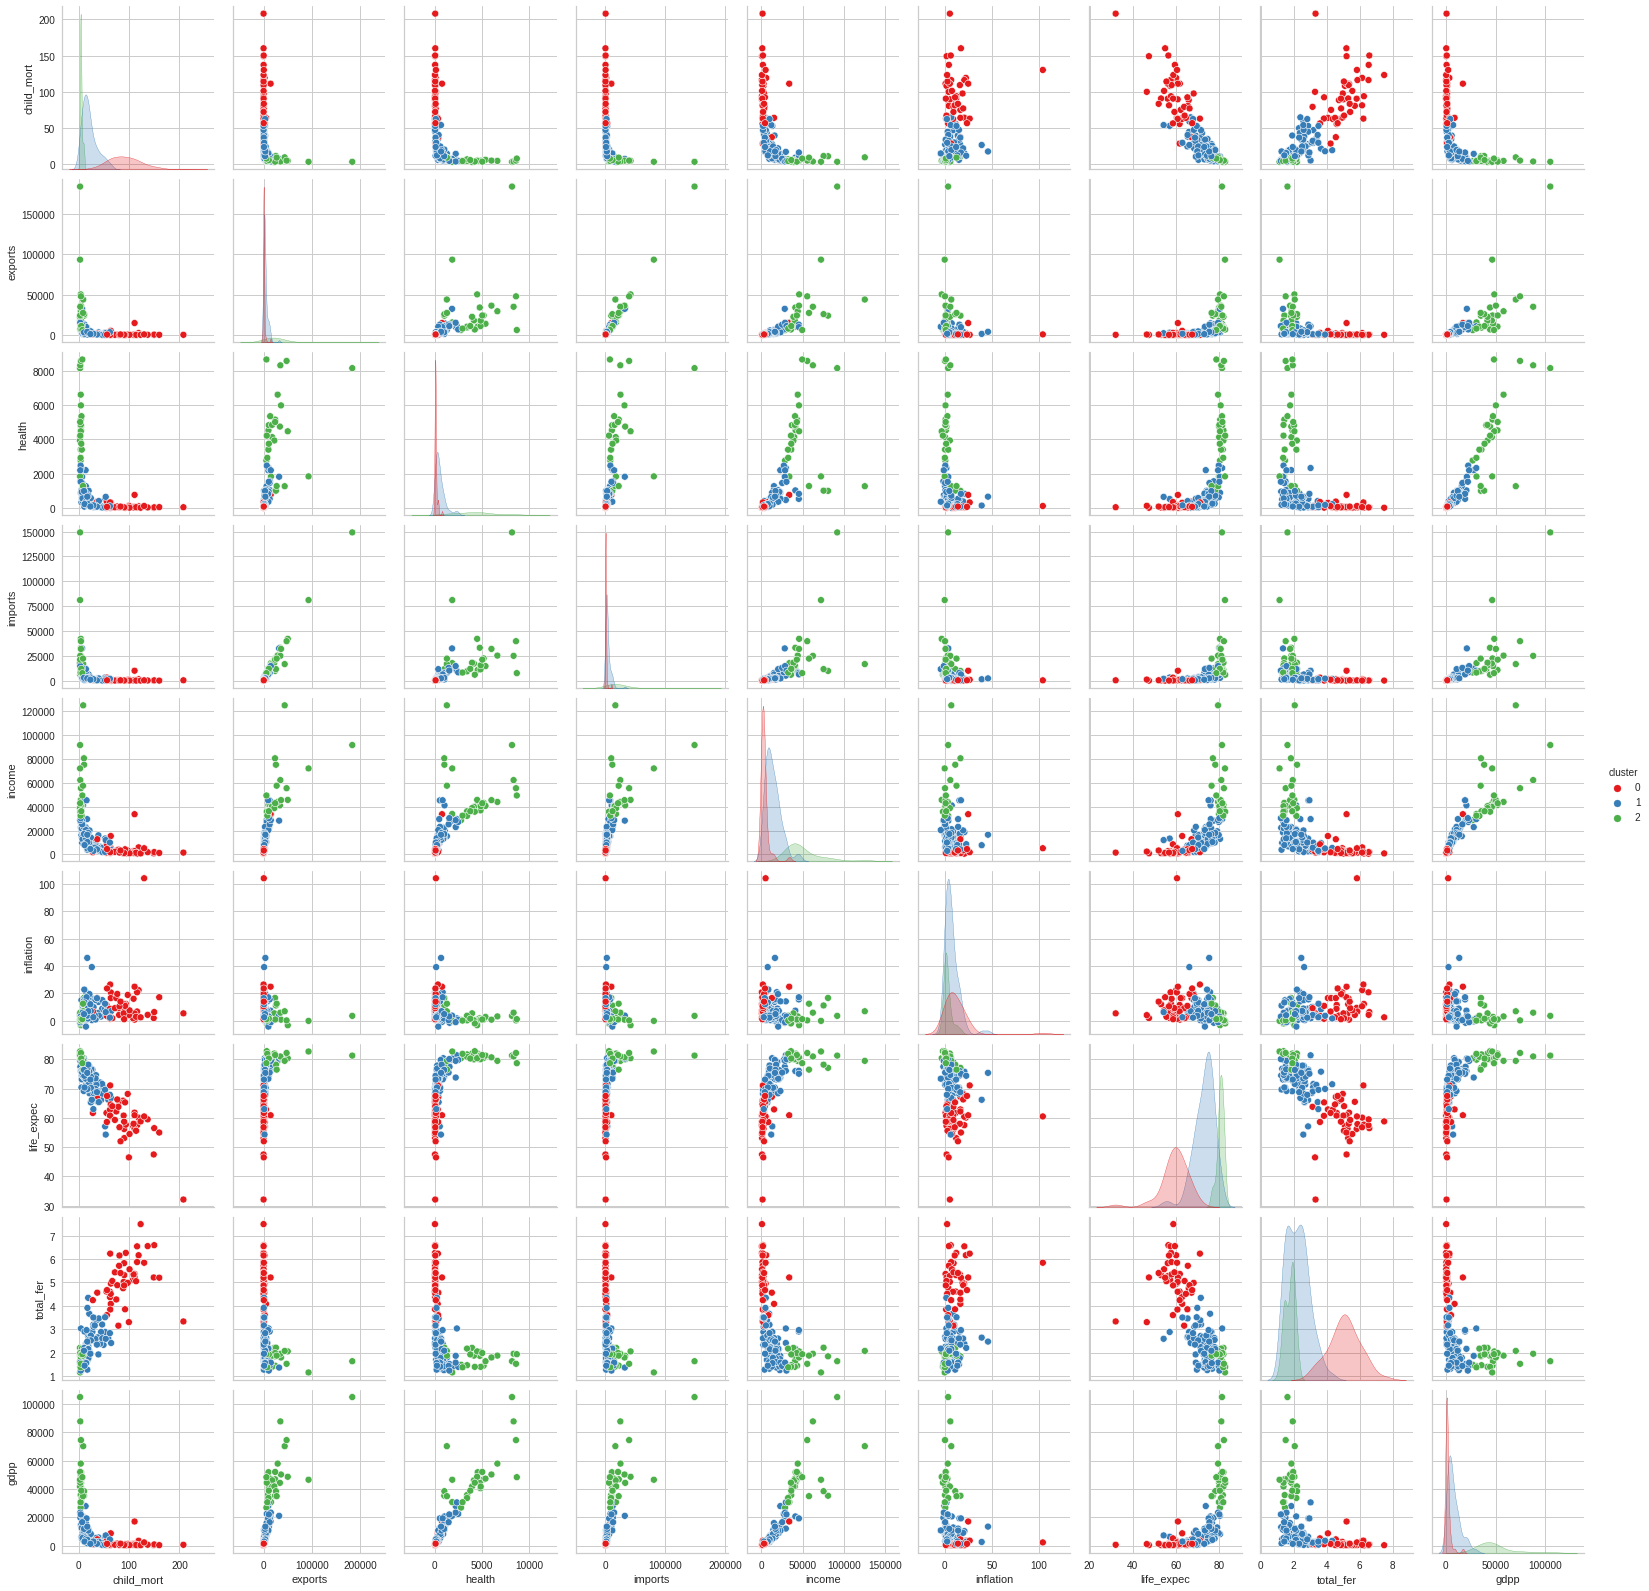

In [28]:
plt.figure(figsize=(8,6))
sns.pairplot(data, hue='cluster', palette="Set1")
plt.show()

In [29]:
score = silhouette_score(data_minmax, kmeans_label)
print('Silhouetter Score: %.2f' % score)

Silhouetter Score: 0.48


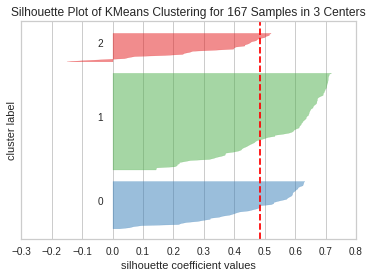

In [30]:
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(data_minmax)
visualizer.poof()